# Question 1: AutoEncoders


## Task :

<ul>
<li>DAC: Deep Autoencoder-based Clustering.</li>
</ul>


## Suggested Model

Figure 1 shows an overview of our deep autoencoder-based clustering framework. There
are two main steps: training and clustering testing. In the training step, a deep autoencoder with an encoder and a decoder is trained using the training set. Here a flattened
input vector is fed into the multilayer deep encoder which has a low dimensional learned
representation. This learned representation is further fed into a decoder that tries to recover an output of the same size as the input. The training process of this autoencoder
tries to reconstruct the input as much as possible. In the following clustering step, we
apply the autoencoder to the testing set. The output of the encoder (learned representations) is then fed to a classic K-Means algorithm to do clustering. The learned low
dimensional representation vector contains key information of the given input, and thus
yield better clustering results.

- Source-paper: DAC: Deep Autoencoder-based Clustering, a General Deep Learning Framework of Representation Learning


<img src="Images/Q3-model.png" width = 500>


## Importing libraries


In [1]:
#import libraries
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import keras.backend as K

In [2]:
#download dataset
(images_train, label_train),(images_test,label_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Plot 5 random data of our dataset

[26761, 7967, 29486, 16447, 59359]


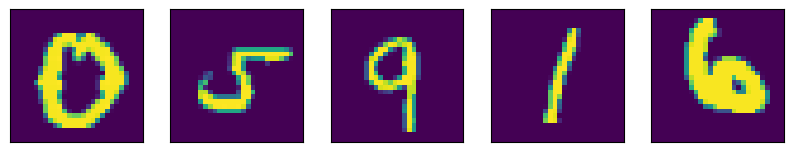

In [3]:
#show mnist dataset
import random
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))

rand_list=[]
for i in range(5):
    rand_list.append(random.randint(0,60000))
print(rand_list)

j=0
for i in rand_list:
  plt.subplot(5,5,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images_train[i])
  j=j+1
plt.show()

# Normalization

In [4]:
#data normalization
train_images = images_train.astype('float32')/255
test_images = images_test.astype('float32')/255

train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

## 1.Designing Deep Auto Encoder Cluster Model ( based on given figure )


In [5]:
#auto_encoder
input_size = 784      #input size
hidden_size1 = 512    #Number of neurons in the first layer
hidden_size2 = 128    #Number of neurons in the second layer
hidden_size3 = 32    #Number of neurons in the third layer
latent_size = 10      #latent size

#encoder and decoder
input_img = Input(shape = (input_size,))
hidden_layer_1 = Dense(hidden_size1, activation = "relu")(input_img)
hidden_layer_2 = Dense(hidden_size2, activation = "tanh")(hidden_layer_1)
hidden_layer_3 = Dense(hidden_size3, activation = "tanh")(hidden_layer_2)
#latent space
latent_layer = Dense(latent_size)(hidden_layer_3)
hidden_layer_4 = Dense(hidden_size3, activation = "tanh")(latent_layer)
hidden_layer_5 = Dense(hidden_size2, activation = "tanh")(hidden_layer_4)
hidden_layer_6 = Dense(hidden_size1, activation = "tanh")(hidden_layer_5)
output_layer = Dense(input_size, activation = "sigmoid")(hidden_layer_6)

autoencoder = Model(input_img, output_layer)

In [6]:
#encoder model
encoder = Model(input_img, latent_layer)

## 2. Import, Normalize, and Train Data


In [7]:
#compile the model
#fit the model with adam optimizer and binary cross entropy
# autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")
def custom_loss(y_true, y_pred):
    # Calculate the Mean Squared Error (MSE)
    mse = K.mean(K.square(y_true - y_pred))

    # Add regularization term: 0.00001 * MSE
    custom_loss = mse + 0.00001 * mse

    return custom_loss

custom_optimizer = Adam(learning_rate=0.003)
autoencoder.compile(optimizer=custom_optimizer, loss=custom_loss)

In [8]:
#fit the model with 100 epochs
autoencoder.fit(train_images, train_images, epochs =50, shuffle = True, validation_data = (test_images, test_images))

Epoch 1/50
1875/1875 [==============================] - 23s 6ms/step - loss: 0.0355 - val_loss: 0.0238
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0228 - val_loss: 0.0212
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0205 - val_loss: 0.0195
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195 - val_loss: 0.0185
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0189 - val_loss: 0.0184
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0184 - val_loss: 0.0182
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0181 - val_loss: 0.0185
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0179 - val_loss: 0.0176
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

# Evaluate the Auto-encoder

In [9]:
#predict test data with model
encoded_img = autoencoder.predict(test_images)

313/313 [==============================] - 1s 2ms/step


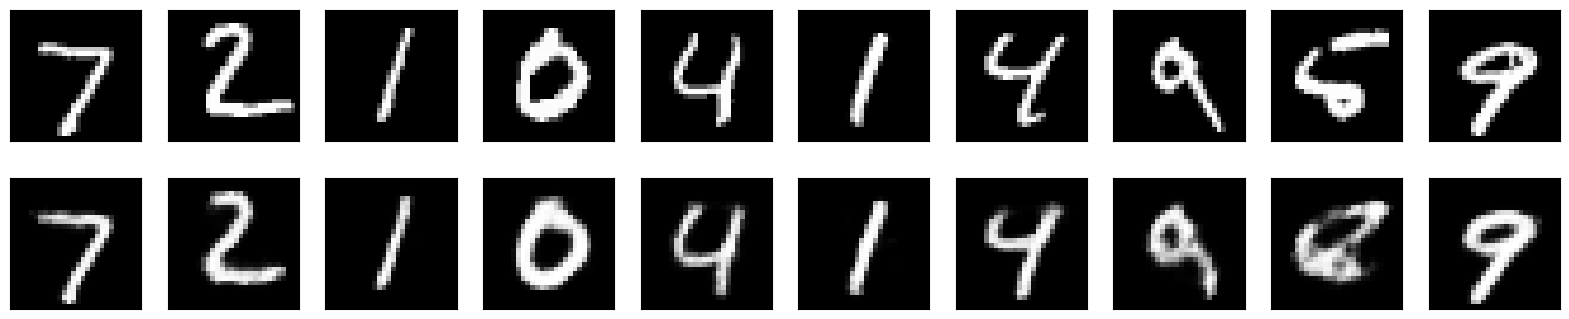

In [10]:
#Display actual test images and images made with model
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original data
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 3. Clustering, Using K-Means algorithm


In [11]:
from sklearn.cluster import KMeans

In [12]:
encoded_train = encoder.predict(train_images)
encoded_test = encoder.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [13]:
import numpy as np
n_clusters = 10

encoded_train_combined = np.column_stack((encoded_train, label_train))
encoded_test_combined = np.column_stack((encoded_test, label_test))
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(encoded_train_combined)
cluster_labels_test = kmeans.predict(encoded_test_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
cluster_to_label_mapping = {}
for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels_test == i)[0]
    true_labels = encoded_test_combined[cluster_indices, -1]
    most_common_label = np.bincount(true_labels.astype(int)).argmax()
    cluster_to_label_mapping[i] = most_common_label

predicted_labels_test = [cluster_to_label_mapping[cluster] for cluster in cluster_labels_test]
accuracy_test = accuracy_score(label_test, predicted_labels_test)
print(f"Test clustering accuracy: {accuracy_test * 100:.2f}%")

Test clustering accuracy: 96.18%


Adjusted Rand Index (ARI)

In [16]:
from sklearn.metrics import adjusted_rand_score

# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(label_test, predicted_labels_test)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.9189
